# Homework - perform $\textit{Multiple Linear Regression}$ (MLR) on the `FuelConsumption.csv data`
$\textbf{By Joseph Nicolay Ruiz A.}$

* use follwing features: `['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB'`
* make a two 2D plot of ENGINESIZE vs CO2EMISSIONS and CYLINDERS vs CO2EMISSIONS
* make a 3D plot of ENGINESIZE and CYLINDERS vs CO2EMISSIONS
* apply feature scaling (be able to swith it off and on) (commented or not commented)
* split the data into X_train/y_train and X_test/y_test (80%-20%)
  using `from sklearn.model_selection import train_test_split`
* train the model using X_train data
* evaluate the fit (R-Squared)
* print the metrics MAE, MAPE
* predict CO2 emission of the 10 randomly chosen cars, compare with the true values
* compare results with the simple single feature regression
* write short comments on each step

# Load python libraries

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn import linear_model

%matplotlib inline

<h2 id="understanding_data">Understanding the Data</h2>

### `FuelConsumption.csv`:

We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01)

*   **MODELYEAR** e.g. 2014
*   **MAKE** e.g. Acura
*   **MODEL** e.g. ILX
*   **VEHICLE CLASS** e.g. SUV
*   **ENGINE SIZE** e.g. 4.7
*   **CYLINDERS** e.g 6
*   **TRANSMISSION** e.g. A6
*   **FUELTYPE** e.g. z
*   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
*   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
*   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
*   **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


<h2 id="reading_data">Reading the data into Pandas</h2>

In [23]:
df = pd.read_csv("FuelConsumption.csv")
df.head(3)
#df.describe()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136


Let's select some features that we want to use for regression.


In [24]:
df_select = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
df_select.head()


,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244


Let's plot Emission values with respect to Engine size:


<h2 id="reading_data">Visualize the data in 2D</h2>

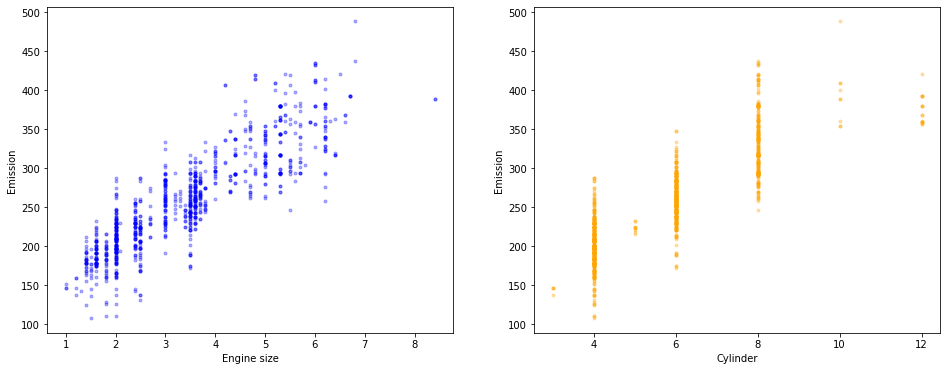

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(16,6))

#ax[0].plot(df_select['ENGINESIZE'],df_select['CO2EMISSIONS'],'*')

ax[0].scatter(df_select['ENGINESIZE'], df_select['CO2EMISSIONS'],  color='blue',marker='.', alpha=0.3)
ax[0].set_xlabel("Engine size")
ax[0].set_ylabel("Emission")

ax[1].scatter(df_select['CYLINDERS'], df_select['CO2EMISSIONS'],  color='orange',marker='.',alpha=0.3)
ax[1].set_xlabel("Cylinder")
ax[1].set_ylabel("Emission")

plt.show()

fig.tight_layout(pad=1.5)

<h2 id="reading_data">Visualize the data in 3D</h2>

Text(0.5, 0, 'CO2 Emissions')

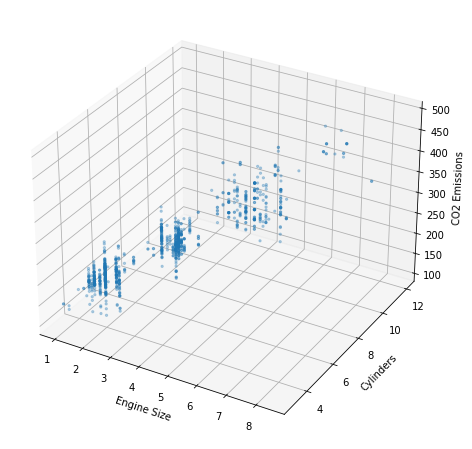

In [26]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(df_select["ENGINESIZE"], df_select["CYLINDERS"], df_select["CO2EMISSIONS"], marker='.', alpha=0.3)
ax.set_xlabel("Engine Size")
ax.set_ylabel("Cylinders")
ax.set_zlabel("CO2 Emissions")

# Normalize the data by feature-scaling
* try to make in a way that you can turn it on and off
* if you comment the feature scaling the program should still work

In [6]:
def scaling(data_set1,choice):
     
    if choice:
        data_set1 = (data_set1 - data_set1.mean())/(data_set1.std())
        return data_set1
    else:
        return data_set1

In [46]:
df_scaling = scaling(df_select,False)
#df_scaling = scaling(df_select,True)

df_scaling.head()


,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244


# Split the data into train and test using scikit-learn

Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set.
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the model. Therefore, it gives us a better understanding of how well our model generalizes on new data.

We know the outcome of each data point in the testing dataset, making it great to test with! Since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

In [64]:
x_train, x_test, y_train, y_test = train_test_split(df_scaling.loc[:, :'FUELCONSUMPTION_COMB'],
                                                    df_scaling.loc[:, 'CO2EMISSIONS'],
                                                    test_size=0.2) 

<h2 id="multiple_regression_model">Train the model using X_train and y_train sets using scikit-learn</h2>


In [65]:
mult_regr = linear_model.LinearRegression()
mult_regr.fit(x_train,y_train)

print ('Coefficients: ', mult_regr.coef_)
print ('Intercept: ',mult_regr.intercept_)

Coefficients:  [11.33342623  6.50453665 -7.71214264 -8.48885959 25.33637766]
Intercept:  69.83946365489501


As mentioned before, **Coefficient** and **Intercept**  are the parameters of the fitted line.
Given that it is a multiple linear regression model with 3 parameters and that the parameters are the intercept and coefficients of the hyperplane, sklearn can estimate them from our data. Scikit-learn uses plain Ordinary Least Squares method to solve this problem.

#### Ordinary Least Squares (OLS)

OLS is a method for estimating the unknown parameters in a linear regression model. OLS chooses the parameters of a linear function of a set of explanatory variables by minimizing the sum of the squares of the differences between the target dependent variable and those predicted by the linear function. In other words, it tries to minimizes the sum of squared errors (SSE) or mean squared error (MSE) between the target variable (y) and our predicted output ($\hat{y}$) over all samples in the dataset.

OLS can find the best parameters using of the following methods:

*   Solving the model parameters analytically using closed-form equations
*   Using an optimization algorithm (Gradient Descent, Stochastic Gradient Descent, Newton’s Method, etc.)


<h2 id="prediction">Evaluate R2</h2>

In [60]:
R2 = mult_regr.score(x_test, y_test)
print("R2 = ", R2)

R2 =  0.843309415559972


<h2 id="prediction">Prediction C02 emission from ten random cars</h2>

In [61]:
outcome_cars = x_test.sample(10)
pred = mult_regr.predict(outcome_cars)

outcome_cars

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB
936,1.8,4,8.8,7.1,8.0
814,1.6,4,9.3,7.0,8.3
730,6.2,8,17.7,11.9,15.1
143,1.4,4,10.2,8.0,9.2
28,3.0,6,13.1,8.8,11.2
903,3.0,6,13.4,8.8,11.3
982,2.7,4,11.7,8.6,10.3
587,3.6,6,17.7,13.0,15.6
575,2.4,4,12.1,9.4,10.9
954,2.5,4,14.2,10.4,12.5


In [62]:
for i in range(len(outcome_cars)):
    print(outcome_cars.iloc[i].reset_index())
    print("CO2 predicton \t", pred[i])
    print("CO2 real value \t", y_test[outcome_cars.index.to_numpy()[i]], "\n")
    print("------------------------------")


                  index  936
0            ENGINESIZE  1.8
1             CYLINDERS  4.0
2  FUELCONSUMPTION_CITY  8.8
3   FUELCONSUMPTION_HWY  7.1
4  FUELCONSUMPTION_COMB  8.0
CO2 predicton 	 189.78389422355076
CO2 real value 	 184 

------------------------------
                  index  814
0            ENGINESIZE  1.6
1             CYLINDERS  4.0
2  FUELCONSUMPTION_CITY  9.3
3   FUELCONSUMPTION_HWY  7.0
4  FUELCONSUMPTION_COMB  8.3
CO2 predicton 	 191.73162234352787
CO2 real value 	 191 

------------------------------
                  index   730
0            ENGINESIZE   6.2
1             CYLINDERS   8.0
2  FUELCONSUMPTION_CITY  17.7
3   FUELCONSUMPTION_HWY  11.9
4  FUELCONSUMPTION_COMB  15.1
CO2 predicton 	 339.7456599431499
CO2 real value 	 347 

------------------------------
                  index   143
0            ENGINESIZE   1.4
1             CYLINDERS   4.0
2  FUELCONSUMPTION_CITY  10.2
3   FUELCONSUMPTION_HWY   8.0
4  FUELCONSUMPTION_COMB   9.2
CO2 predicton 	 196.895665

<h2 id="prediction">Metrics</h2>

* MAE    
* MAPE    
* R-squared    

In [66]:
def MAE(y, y_pred):
    return np.mean(abs(y - y_pred))

def MAPE(y, y_pred):
    return 100*np.mean(abs( ((y - y_pred)/(y)) ))

In [67]:
preds = mult_regr.predict(x_test)

print("Mean Average Error (MAE): %.3f" % MAE(y_test.to_numpy(), preds))
print("Mean Absolute Percentual Error (MAPE): %.3f" % MAPE(y_test.to_numpy(), preds))
print("R2-score: %.3f" % mult_regr.score(x_test, y_test))



Mean Average Error (MAE): 16.823
Mean Absolute Percentual Error (MAPE): 6.482
R2-score: 0.879


# Compare results with the simple single feature regression $\textit{(Linear Regression)}$

In [68]:
for feature in ['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB']:
    
    regr = linear_model.LinearRegression()
    X_train = x_train[[feature]].to_numpy()
    X_test = x_test[[feature]].to_numpy()
    
    regr.fit(X_train, y_train)    
    pred_regr = regr.predict(X_test)
    
    print(feature)
    print("Mean Average Error (MAE): %.3f" % MAE(y_test, pred_regr))
    print("Mean Absolute Percentual Error (MAPE): %.3f" % MAPE(y_test, pred_regr))
    print("R2-score: %.3f" % regr.score(X_test, y_test))
    print("--------------------- \n")

ENGINESIZE
Mean Average Error (MAE): 22.964
Mean Absolute Percentual Error (MAPE): 9.090
R2-score: 0.784
--------------------- 

CYLINDERS
Mean Average Error (MAE): 24.745
Mean Absolute Percentual Error (MAPE): 9.820
R2-score: 0.757
--------------------- 

FUELCONSUMPTION_CITY
Mean Average Error (MAE): 20.518
Mean Absolute Percentual Error (MAPE): 7.549
R2-score: 0.819
--------------------- 

FUELCONSUMPTION_HWY
Mean Average Error (MAE): 25.383
Mean Absolute Percentual Error (MAPE): 9.539
R2-score: 0.754
--------------------- 

FUELCONSUMPTION_COMB
Mean Average Error (MAE): 21.445
Mean Absolute Percentual Error (MAPE): 7.905
R2-score: 0.808
--------------------- 



NOTE!!! Ask why MAE is such "enormous" value